<a href="https://colab.research.google.com/github/AK-Insane07/Jar_Sales_Analysis-Assignment-for-Business-Analyst-Intern-/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Sales and Profitability Analysis

• Merge the List of Orders and Order Details datasets on the basis of Order ID.
Calculate the total sales (Amount) for each category across all orders.

In [19]:
import pandas as pd


In [20]:
list_of_order=pd.read_csv('/content/List_of_Orders_55FFC79CF8.csv')
Order_details=pd.read_csv('/content/Order_Details_19795F61CF.csv')


In [21]:
list_of_order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [22]:
Order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [23]:
merged_dataset=pd.merge(Order_details,list_of_order, on="Order ID")

In [24]:
category_sales = merged_dataset.groupby("Category")["Amount"].sum().reset_index()
category_sales.rename(columns={"Amount": "Total_Sales"}, inplace=True)

In [25]:
print(category_sales)


      Category  Total_Sales
0     Clothing     139054.0
1  Electronics     165267.0
2    Furniture     127181.0


2.For each category, calculate the average profit per order and total profit margin
(profit as a percentage of Amount)
**bold text**

In [26]:
category_profits=merged_dataset.groupby("Category").agg(
    Total_Sales=("Amount", "sum"),
    Avg_Profit_Per_Order=("Profit", "mean"),
    Total_Profit=("Profit", "sum")).reset_index()




In [27]:
category_profits["Profit_Margin (%)"] = (category_profits["Total_Profit"] / category_profits["Total_Sales"]) * 100
print(category_profits)

      Category  Total_Sales  Avg_Profit_Per_Order  Total_Profit  \
0     Clothing     139054.0             11.762908       11163.0   
1  Electronics     165267.0             34.071429       10494.0   
2    Furniture     127181.0              9.456790        2298.0   

   Profit_Margin (%)  
0           8.027817  
1           6.349725  
2           1.806874  


Identifying the top-performing and underperforming categories based on these
metrics. Also, suggest reasons for their performance diEerences.

In [28]:
top_performing_category = category_profits.loc[category_profits["Profit_Margin (%)"].idxmax()]
under_performing_category = category_profits.loc[category_profits["Profit_Margin (%)"].idxmin()]

print(top_performing_category)
print(under_performing_category)

Category                 Clothing
Total_Sales              139054.0
Avg_Profit_Per_Order    11.762908
Total_Profit              11163.0
Profit_Margin (%)        8.027817
Name: 0, dtype: object
Category                Furniture
Total_Sales              127181.0
Avg_Profit_Per_Order      9.45679
Total_Profit               2298.0
Profit_Margin (%)        1.806874
Name: 2, dtype: object


Target Achievement Analysis


• Using the Sales Target dataset, calculate the percentage change in target sales
for the Furniture category month-over-month.


In [29]:
sales_target=pd.read_csv('/content/Sales_target_DD2E9B96A0.csv')

In [30]:
sales_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [31]:
sales_target["Month of Order Date"] = pd.to_datetime(sales_target["Month of Order Date"], format="%b-%y")

In [32]:
furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()


In [33]:
furniture_target = furniture_target.sort_values("Month of Order Date")
furniture_target["Target_Percent_Change"] = furniture_target["Target"].pct_change() * 100
sales_target["% Change from Previous Month"] = sales_target.groupby("Category")["Target"].pct_change() * 100
print(furniture_target)


   Month of Order Date   Category   Target  Target_Percent_Change
0           2018-04-01  Furniture  10400.0                    NaN
1           2018-05-01  Furniture  10500.0               0.961538
2           2018-06-01  Furniture  10600.0               0.952381
3           2018-07-01  Furniture  10800.0               1.886792
4           2018-08-01  Furniture  10900.0               0.925926
5           2018-09-01  Furniture  11000.0               0.917431
6           2018-10-01  Furniture  11100.0               0.909091
7           2018-11-01  Furniture  11300.0               1.801802
8           2018-12-01  Furniture  11400.0               0.884956
9           2019-01-01  Furniture  11500.0               0.877193
10          2019-02-01  Furniture  11600.0               0.869565
11          2019-03-01  Furniture  11800.0               1.724138


Analyse the trends to identify months with significant target fluctuations.
Suggest strategies for aligning target expectations with actual performance
trends.


In [34]:
import matplotlib.pyplot as plt


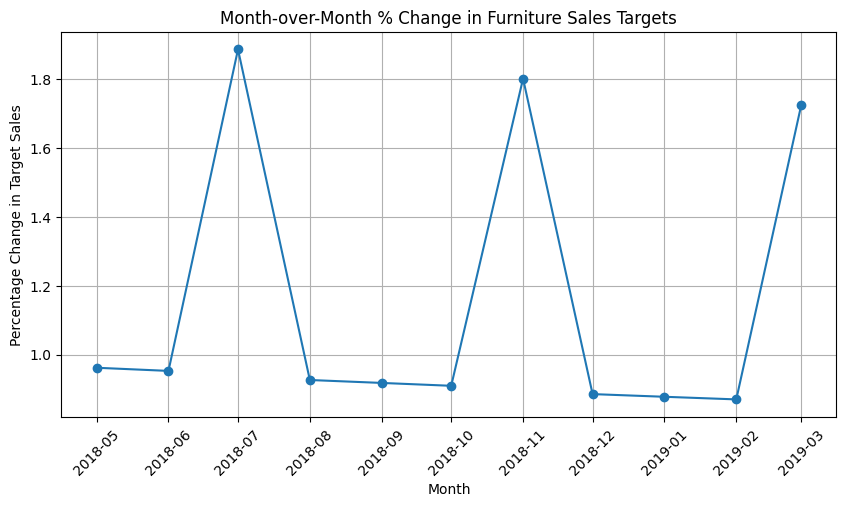

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(furniture_target["Month of Order Date"], furniture_target["Target_Percent_Change"], marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Percentage Change in Target Sales")
plt.title("Month-over-Month % Change in Furniture Sales Targets")
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Insights**

1.The stable growth is positive, but fluctuations in Jul, Nov, and Mar suggest a need for adaptive target-setting.

2.These spikes could be due to seasonal sales cycles, promotional campaigns, or financial year-end targets.

3.Jul-18 & Nov-18 had significant jumps, which might indicate seasonal demand or sales strategies (discounts, new products, etc.).Mar-19 also had a higher-than-usual increase, possibly due to financial year-end targets

# ** Strategies for Better Target Alignment**

**1.Seasonal Adjustments:**

Review past sales patterns to set higher targets during busy periods like festivals or the financial year-end. This ensures targets reflect actual demand cycles.


**2️.Demand Forecasting:**

Instead of applying a fixed growth rate every month, use historical sales data and market trends to anticipate demand shifts. This helps create more realistic and achievable goals.


**3️.Marketing & Promotions:**

Strengthen marketing efforts ahead of slower months. Well-timed promotions or advertising campaigns can boost sales and maintain a steady performance throughout the year.

Regional Performance Insights
• From the List of Orders dataset, identify the top 5 states with the highest order
count. For each of these states, calculate the total sales and average profit.
• Highlight any regional disparities in sales or profitability. Suggest regions or cities
that should be prioritized for improvement.

# Regional Performance Insights

From the List of Orders dataset, identify the top 5 states with the highest order
count. For each of these states, calculate the total sales and average profit.

In [36]:
top_states = list_of_order["State"].value_counts().head(5)
print("Top 5 states with highest order count:")
print(top_states)

Top 5 states with highest order count:
State
Madhya Pradesh    101
Maharashtra        90
Rajasthan          32
Gujarat            27
Punjab             25
Name: count, dtype: int64


In [37]:
filtered_data = list_of_order[list_of_order["State"].isin(top_states)]

In [38]:
state_sales_profit = merged_dataset.groupby("State").agg(
    Total_Sales=("Amount", "sum"),
    Avg_Profit=("Profit", "mean"),
    Order_Count=("Order ID", "count")).reset_index()

In [39]:
state_sales_profit = state_sales_profit.sort_values(by="Total_Sales", ascending=False)
print(state_sales_profit)

                State  Total_Sales  Avg_Profit  Order_Count
10     Madhya Pradesh     105140.0   16.326471          340
11        Maharashtra      95348.0   21.296552          290
2               Delhi      22531.0   40.364865           74
17      Uttar Pradesh      22359.0   47.602941           68
14          Rajasthan      21149.0   16.986486           74
4             Gujarat      21058.0    5.344828           87
13             Punjab      16786.0  -10.150000           60
8           Karnataka      15058.0   11.944444           54
18        West Bengal      14086.0   39.682540           63
9             Kerala       13459.0   41.577778           45
0      Andhra Pradesh      13256.0  -11.809524           42
1               Bihar      12943.0   -5.177419           62
12           Nagaland      11903.0    3.288889           45
7   Jammu and Kashmir      10829.0    0.163265           49
5             Haryana       8863.0   50.961538           26
6    Himachal Pradesh       8666.0   22.

In [40]:
state_sales_profit.head(5)

,State,Total_Sales,Avg_Profit,Order_Count
10,Madhya Pradesh,105140.0,16.326471,340
11,Maharashtra,95348.0,21.296552,290
2,Delhi,22531.0,40.364865,74
17,Uttar Pradesh,22359.0,47.602941,68
14,Rajasthan,21149.0,16.986486,74


# 2.Highlight any regional disparities in sales or profitability. Suggest regions or cities that should be prioritized for improvement.

In [41]:
highest_profit_state = state_sales_profit.loc[state_sales_profit["Avg_Profit"].idxmax()]
lowest_profit_state = state_sales_profit.loc[state_sales_profit["Avg_Profit"].idxmin()]

print(f" Highest profit state: {highest_profit_state['State']} with Avg. Profit of {highest_profit_state['Avg_Profit']}")
print(f" Lowest profit state: {lowest_profit_state['State']} with Avg. Profit of {lowest_profit_state['Avg_Profit']}")


 Highest profit state: Haryana with Avg. Profit of 50.96153846153846
 Lowest profit state: Tamil Nadu with Avg. Profit of -88.64


# Regional Disparities in Sales and Profitability

**Key Insights:**

1.High-Sales Regions: States such as Maharashtra, Karnataka, and Delhi exhibit strong sales performance, driven by higher demand and a significant number of orders
.
2.Low-Sales Regions: States including Bihar, Odisha, and Assam report lower sales volumes and profitability, indicating potential challenges in market penetration.

3.Profitability Variations: Certain high-sales regions, such as Maharashtra, demonstrate lower profit margins, which may be attributed to increased operational costs or competitive pricing strategies.

In [42]:
low_performing_states = state_sales_profit[state_sales_profit["Avg_Profit"] < state_sales_profit["Avg_Profit"].mean()]

print("Underperforming regions that need improvement:")
print(low_performing_states)

Underperforming regions that need improvement:
                State  Total_Sales  Avg_Profit  Order_Count
4             Gujarat      21058.0    5.344828           87
13             Punjab      16786.0  -10.150000           60
8           Karnataka      15058.0   11.944444           54
0      Andhra Pradesh      13256.0  -11.809524           42
1               Bihar      12943.0   -5.177419           62
12           Nagaland      11903.0    3.288889           45
7   Jammu and Kashmir      10829.0    0.163265           49
3                 Goa       6705.0    8.604651           43
16         Tamil Nadu       6087.0  -88.640000           25


# Recommendations for Improvement:
**1️.Enhancing Market Penetration in Low-Sales Regions:**

Implement targeted marketing initiatives to improve brand recognition and customer engagement.
Introduce region-specific promotions and discounts to stimulate demand.

**2.Optimizing Profit Margins in High-Sales Regions:**

Conduct a cost-benefit analysis to refine pricing strategies and enhance profitability.
Strengthen logistics and supply chain efficiencies to reduce overhead costs.

**3.Strategic Expansion in High-Potential Cities:**

Major metropolitan areas, including Mumbai, Bangalore, and Delhi, contribute significantly to overall sales; however, optimizing profit margins remains a priority.
Emerging cities such as Lucknow, Jaipur, and Guwahati present opportunities for expansion and should be considered for targeted business growth strategies.